# Kaggle's House Price Prediction 

### Importing important libraries and modules 

In [127]:
import pandas as pd
import sklearn 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

#remove warnings
import warnings
warnings.filterwarnings('ignore')

### Load and pick Datas

In [128]:
train_data = pd.read_csv('House_Price/train.csv')
test_data = pd.read_csv('House_Price/test.csv')

## Data Visualisation 

In [129]:
train_data.shape

(1460, 81)

In [130]:
test_data.shape

(1459, 80)

In [131]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### What our objective is :
* Variable - Variable name.
* Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
* Expectation - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* Comments - Any general comments that occured to us.

#### Analysing SalePrice 

In [134]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Very well... It seems that your minimum price is larger than zero. Excellent!

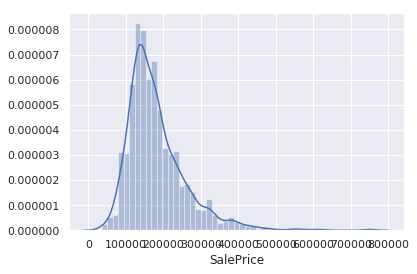

In [135]:
#histogram
sns.distplot(train_data['SalePrice'])

* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

In [136]:
#checking skewness(distortion from symetrical distribution) and kurtosis(the sharpness of the peak of a frequency-distribution curve.)
print("Skewness %f" %train_data['SalePrice'].skew())
print("Kurtosis %f" %train_data['SalePrice'].kurt())

Skewness 1.882876
Kurtosis 6.536282


#### Let's consider some of the segment I expected 

* Relation with numerical Variable 

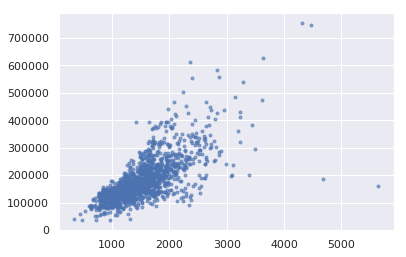

In [137]:
# scatter plot grlivarea/saleprice
plt.plot(train_data.GrLivArea , train_data.SalePrice,'.', alpha = 0.6)

GrLivArea and SalePrice have a good relation and it's moreover linear . 

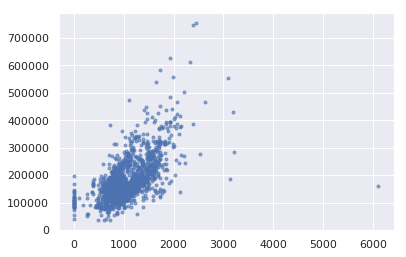

In [138]:
# scatter plot TotalBsmtSF/saleprice
plt.plot(train_data.TotalBsmtSF , train_data.SalePrice,'.', alpha = 0.6)

TotalBsmtSF is also shown a good relation with SalePrice . There are some outliers .

### Relation with categorial features :

(-0.5, 9.5, 0, 800000)

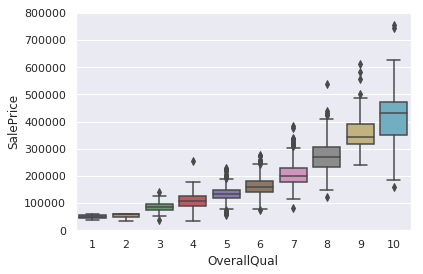

In [139]:
# box plot of OverallQual/SalePrice 
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=train_data)
fig.axis(ymin=0, ymax=800000)

Wow , SalePrice increases as per the quality .
Cool !

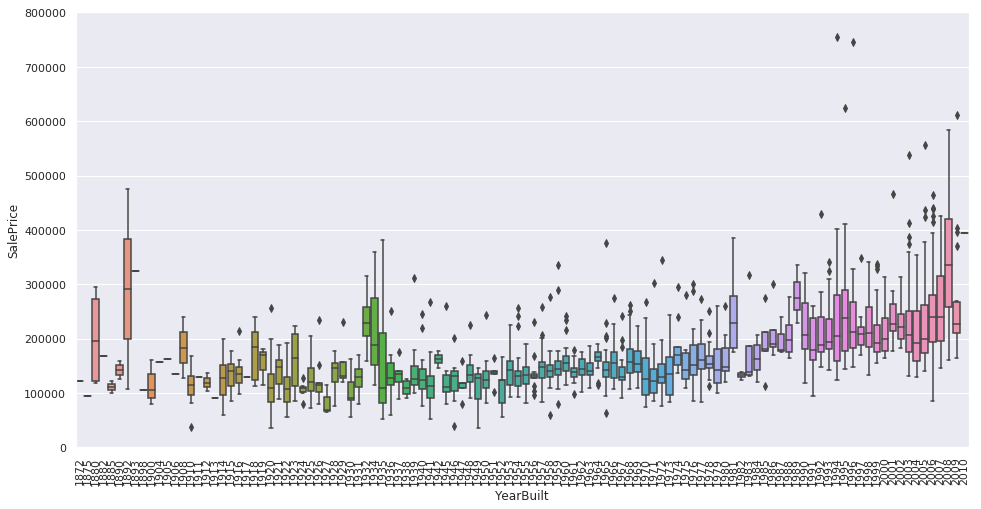

In [140]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### In summary :
* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly relatable with 'SalePrice'. Both relationship are positive , which means as one variable increases .In case of'TotalBsmtSF' , we can see that the slope of the linear relarip is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice' . The relationship seems to be stronger in the case of 'OverallQual' , where the box plot shows how sale price increases with overall quality.

I just analysed four variables, but there are many other that I should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

###  Correlation matrix (heatmap style)

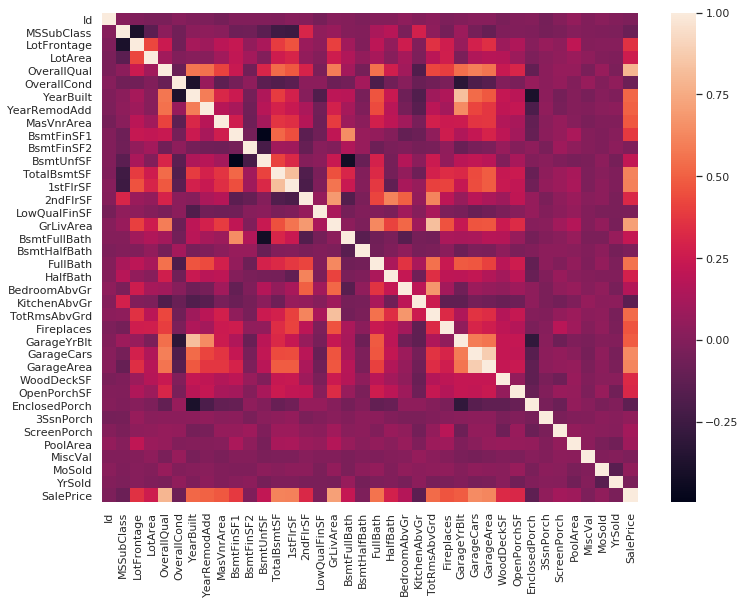

In [141]:
corr = train_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Heatmap is the best way to get a quick overview of data <br>
At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.<br>

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.



#### SalePrice correlation matrix (zoomed heatmap style)

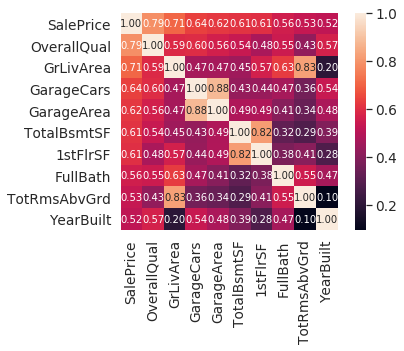

In [142]:
#saleprice correlation matrix
k = 10 # number of vriables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

These are the variables most correlated with "SalePrice" . My thoughts on this :<br>
* "OverallQual", "GrLivArea" and "TotalBsmtSF" are strongly correlated with "SalePrice". <br>
* "GarageCars" and "GarageArea" are also some of the most strongly correlated vriables . However , as we discussed in the last sub-point, the number of cars that fit into the garage is a consequences of the garage area . "GarageCars" and "GarageArea" are like twin brothers .You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right .
*  'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.


Let's proceed to the scatter plots.

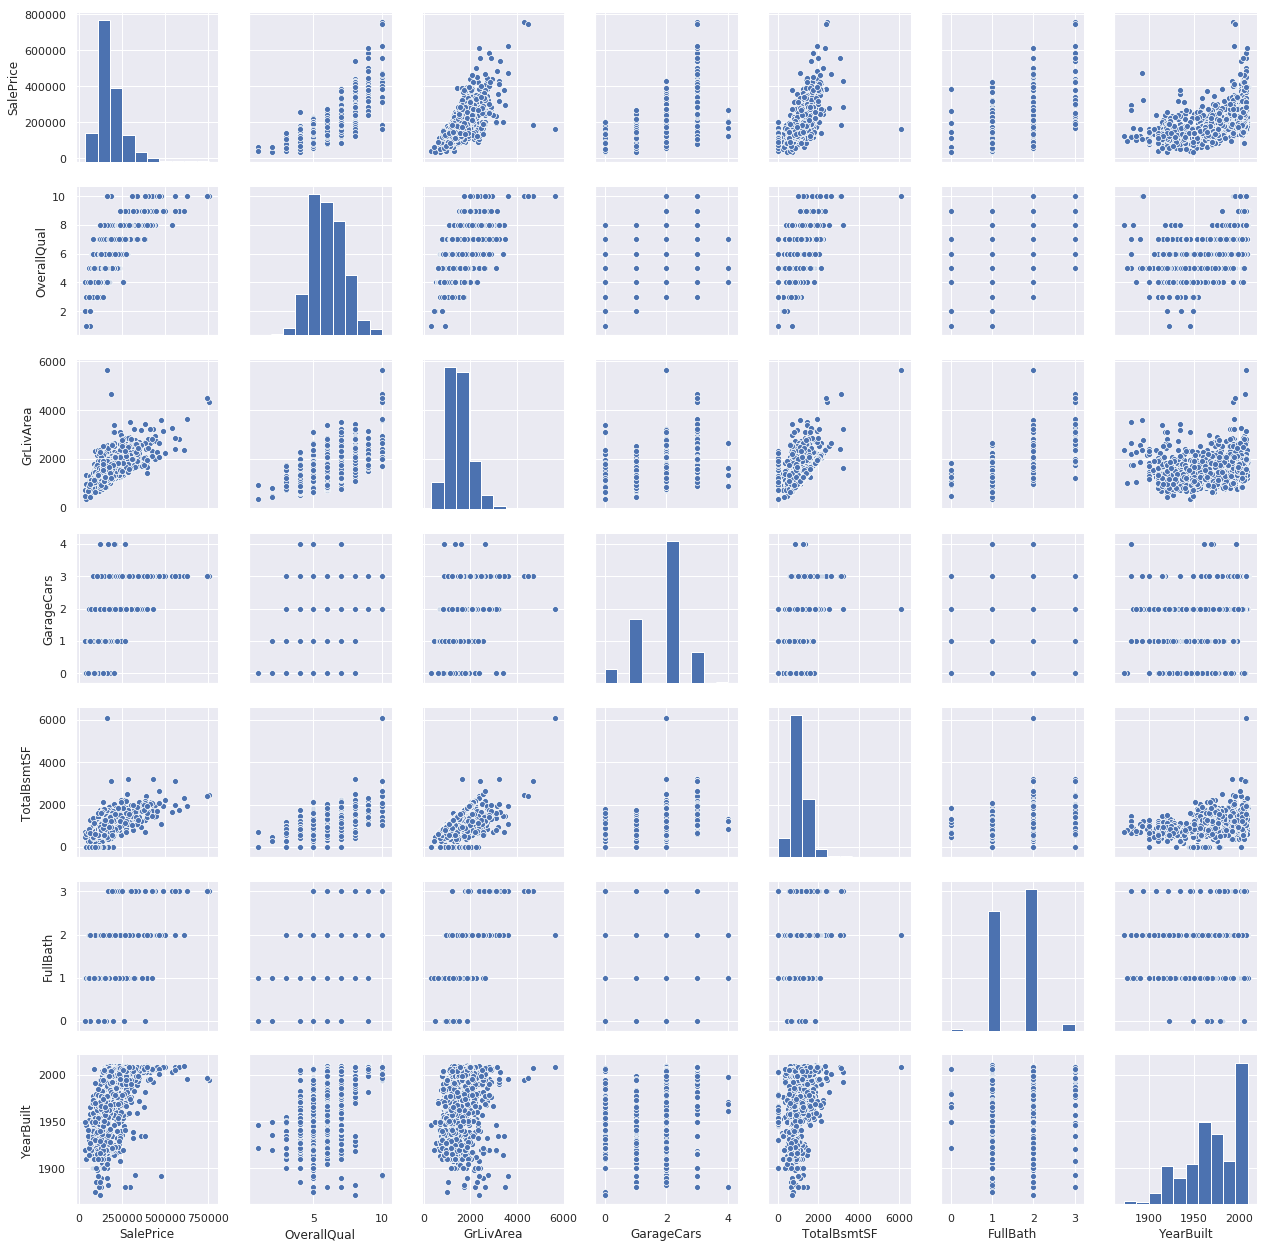

In [143]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.   

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).      

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'. Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).




### Missing Data :
Important questions when thinking about missing data:

*      How prevalent is the missing data?
*      Is missing data random or does it have a pattern?


The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [144]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [145]:
# missing data 
total = train_data.isnull().sum().sort_values(ascending=False)
percent =(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data .<br>
We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.



In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.



Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.



Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.



In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.


In [146]:
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index, 1)
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max() # just checking that thereis no missing values 
print(train_data.shape)

(1459, 63)


### Outliers !

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.    

Outliers is a complex subject and it deserves more attention.

Bivariate analysis :

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


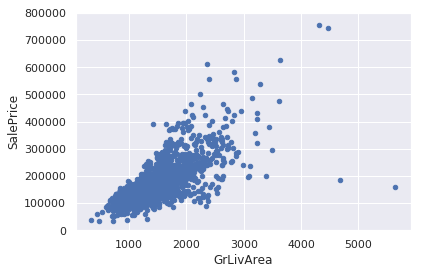

In [147]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = train_data
data.plot.scatter(x=var, y ='SalePrice', ylim=(0, 800000))

What has been revealed:



The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [148]:
#deleting points 
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [149]:
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


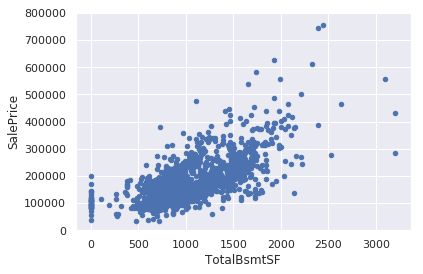

In [150]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

#### Getting a lil' deep :

In the search for normality


The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* Histogram - Kurtosis and skewness.
* Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

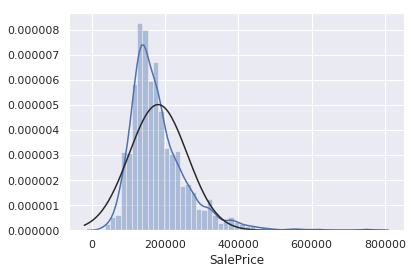

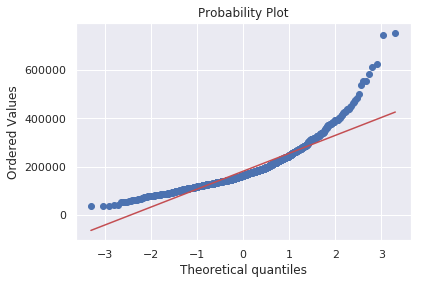

In [151]:
#histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.



But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things we can learn in statistical books: in case of positive skewness, log transformations usually works well. 



In [152]:
#applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])


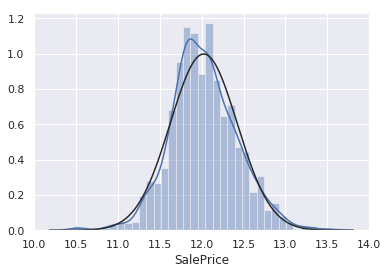

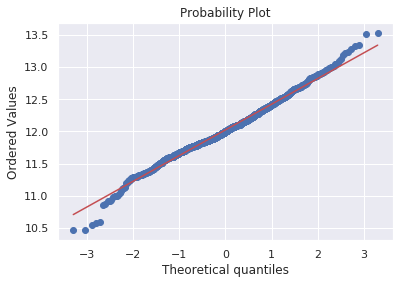

In [153]:
#transformed histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

Done ! Let's check what's going with 'GriLivAre'

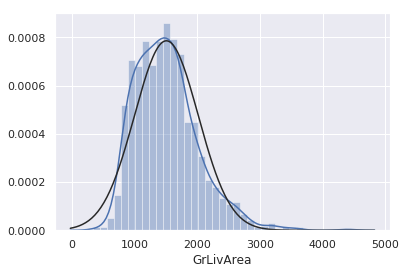

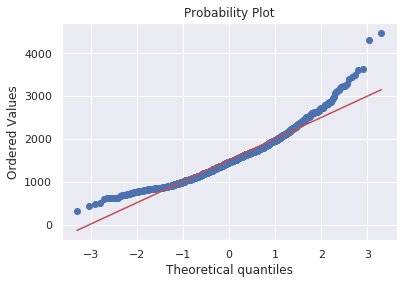

In [154]:
#histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

In [155]:
#data transformation
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

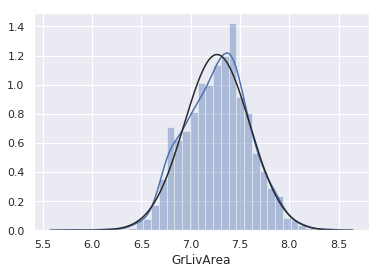

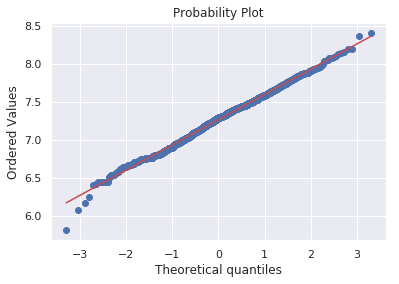

In [156]:
#transformed histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

let's see Next :

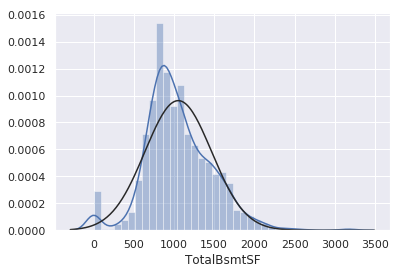

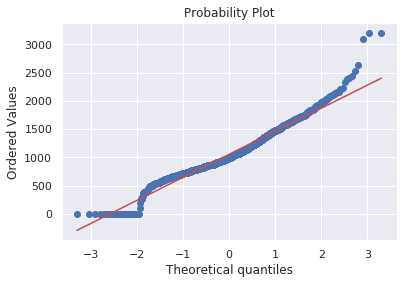

In [157]:
#histogram and normal probability plot
sns.distplot(train_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)


Ok, now we are dealing with the big boss. What do we have here?  

* Something that, in general, presents skewness.  
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.   

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [158]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [159]:
#transform data
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

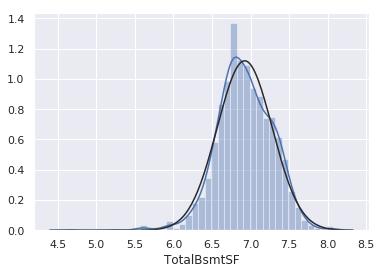

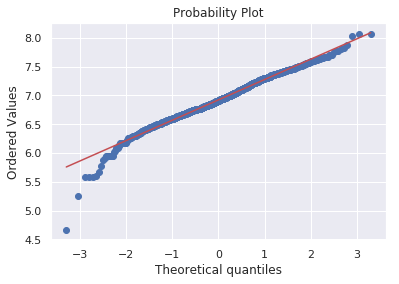

In [160]:
#histogram and normal probability plot
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

Get Dummy variable 

In [161]:
#convert categorical variablr into dummy 
#train_data = pd.get_dummies(train_data)

In [162]:
train_data.shape

(1457, 64)

That's it! We reached the end of data visualistion and exploration.



Throughout .  we put in practice many of the strategie. We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.



Let's do some hands over test data :

In [163]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [164]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [165]:
### missing data 
total = test_data.isnull().sum().sort_values(ascending=False)
percent =(test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [166]:
cols = ['PoolQC', 'MiscFeature','LotFrontage', 'Alley', 'Fence', 'FireplaceQu','GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MasVnrArea']

In [167]:
len(cols)

18

In [168]:
test_data = test_data.drop(cols, axis =1)

In [169]:
### missing data 
total = test_data.isnull().sum().sort_values(ascending=False)
percent =(test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685


In [170]:
for col in ('MSZoning','BsmtHalfBath', 'BsmtFullBath', 'Functional', 'Utilities', 'Exterior2nd', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'SaleType', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'Exterior1st'):
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [171]:
test_data.isnull().sum().max()

0

In [172]:
test_data.shape

(1459, 62)

In [173]:
#test_data = pd.get_dummies(test_data)

In [174]:
test_data.shape

(1459, 62)

In [175]:
train_data.shape

(1457, 64)

In [189]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
test_data['HasBsmt'] = pd.Series(len(test_data['TotalBsmtSF']), index=test_data.index)
test_data['HasBsmt'] = 0 
test_data.loc[test_data['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
#test_data.loc[test_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(test_data['TotalBsmtSF'])

In [187]:
test_data.shape

(1459, 63)

In [190]:
test_data[['HasBsmt', 'TotalBsmtSF']].head()

,HasBsmt,TotalBsmtSF
0,1,882.0
1,1,1329.0
2,1,928.0
3,1,926.0
4,1,1280.0


Getting Dummies 

In [ ]:
n_train = train_data.shape[0]

In [192]:
n_train

1457

In [193]:
n_test = test_data.shape[0]

In [194]:
n_test

1459

In [195]:
y_train = train_data.SalePrice.values

In [198]:
data = pd.concat((train_data, test_data)).reset_index(drop=True)

In [199]:
data.shape

(2916, 64)

In [203]:
data.drop(['SalePrice'], 1, inplace=True)

In [204]:
data.shape

(2916, 63)

In [209]:
data.isnull().sum().max()

0

In [210]:
data = pd.get_dummies(data)

In [211]:
data.shape

(2916, 221)

In [212]:
X_train = data[:n_train]
X_test = data[n_train:]

In [213]:
X_train.shape

(1457, 221)

In [214]:
X_test.shape

(1459, 221)

In [215]:
y_train.shape

(1457,)

## Model Selction : 

In [218]:
from sklearn import linear_model

In [220]:
lr = linear_model.LinearRegression()

In [221]:
#fit the model
model = lr.fit(X_train, y_train)

In [222]:
print("r^2 is: \n", model.score(X_train, y_train))

r^2 is: 
 0.9455697189634458


In [223]:
y_pred = model.predict(X_test)

Make Submission:

In [225]:
sub = pd.DataFrame()
sub['Id'] = X_test['Id']
sub['SalePrice'] = y_pred
sub.to_csv('prices.csv', index=False)

In [226]:
see = pd.read_csv('prices.csv')

In [227]:
see.head()

,Id,SalePrice
0,1461,991.222770
1,1462,1483.264034
2,1463,1230.673537
3,1464,1222.241035
4,1465,1429.187972


In [228]:
see.shape

(1459, 2)